# Содержание, план работ и описание данных:

## Цель:
### Cоздать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой)
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока)
### С помощью модели нужно отобрать коров по двум критериям:
- Cредний удой за год — не менее 6000 килограммов
- Молоко должно быть вкусным

## Описание данных:
### Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
- id — уникальный идентификатор коровы
- Удой, кг — масса молока, которую корова даёт в год (в килограммах)
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы
- Сырой протеин, г — содержание сырого протеина в корме (в граммах)
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы
- Порода — порода коровы
- Тип пастбища — ландшафт лугов, на которых паслась корова
- порода папы_быка — порода папы коровы
- Жирность,% — содержание жиров в молоке (в процентах)
- Белок,% — содержание белков в молоке (в процентах)
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)
#### Признаки в датасете ferma_main.csv можно разделить на группы
- Характеристики коровы: id, Порода, порода папы_быка, Возраст
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение)
- Характеристика пастбища: Тип пастбища
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока

### Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера
- id — уникальный идентификатор коровы
- Имя Папы — имя папы коровы
### Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой
- Порода — порода коровы
- Тип пастбища — ландшафт лугов, на которых паслась корова
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы
- Текущая_жирность,% — содержание жиров в молоке (в процентах)
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах)
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)
#### Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют
- Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

# 1. Загрузка и анализ данных

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression

## Загрузка данных

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv')
cow_buy = pd.read_csv('/datasets/cow_buy.csv')

# Вывод первых нескольких строк каждого датасета
print("ferma_main:")
print(ferma_main.head())

print("\nferma_dad:")
print(ferma_dad.head())

print("\ncow_buy:")
print(cow_buy.head())

ferma_main:
            id;Удой  кг;ЭКЕ (Энергетическая кормовая единица);Сырой протеин  \
0         1;5863;14                                           2;1743;0        
1         2;5529;12                                           8;2138;0        
2  3;5810;14;1854;0            885;РефлешнСоверинг;Холмистое;Соверин;3        
3         4;5895;12                                           4;2012;0        
4         5;5302;12                                           8;1675;0        

   г;СПО (Сахаро-протеиновое соотношение);Порода;Тип пастбища;порода папы_быка;Жирность  \
0               89;Вис Бик Айдиал;Равнинное;Айдиал;3                                      
1              89;Вис Бик Айдиал;Равнинные;Соверин;3                                      
2                                               59;3                                      
3             885;РефлешнСоверинг;Холмистое;Айдиал;3                                      
4             885;Вис Бик Айдиал;Равнинные;Соверин;3      

## Поменяем разделитель ";"

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, верное решение!
</div>

In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

## Проверим

In [4]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Не «оборачивай» вывод датафрейма функцией print – тогда output будет выглядеть «симпатичнее». Исправь пожалуйста этот момент глобально, во всей "тетрадке".
</div>

## Анализ данных

### ferma_main:
- Названия столбцов нужно переименовать, чтобы избавиться от пробелов и использовать стандартный формат

### ferma_dad:
- Столбец "Имя Папы" нужно переименовать, убрав пробелы.

### cow_buy:
- Названия столбцов нужно переименовать аналогично "ferma_main".

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Хорошо, данные загрузили, первичные проверки сделали.
</div>

## Переименование столбцов

In [7]:
ferma_main.rename(columns={'Удой, кг': 'Удой_кг', 'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ',
                           'Сырой протеин, г': 'Сырой_протеин_г','СПО (Сахаро-протеиновое соотношение)': 'СПО',
                           'Жирность,%': 'Жирность', 'Белок,%': 'Белок', 'Вкус молока': 'Вкус_молока',
                           'порода папы_быка': 'Порода_быка', 'Тип пастбища': 'Тип_пастбища'}, inplace=True)
ferma_dad.rename(columns={'Имя Папы': 'Имя_Папы'}, inplace=True)
cow_buy.rename(columns={'Текущий_уровень_белок,%': 'Белок', 'Текущая_жирность,%': 'Жирность',
                        'Вкус_молока_и_Возраст': 'Вкус_молока_и_Возраст', 'порода папы_быка': 'Порода_быка',
                        'Тип пастбища': 'Тип_пастбища', 'Имя_папы': 'Имя_Папы'}, inplace=True)

## Проверка

In [8]:
print("ferma_main:")
print(ferma_main.head())

print("\nferma_dad:")
print(ferma_dad.head())

print("\ncow_buy:")
print(cow_buy.head())

ferma_main:
   id  Удой_кг   ЭКЕ  Сырой_протеин_г    СПО           Порода Тип_пастбища  \
0   1     5863  14,2             1743   0,89   Вис Бик Айдиал    Равнинное   
1   2     5529  12,8             2138   0,89   Вис Бик Айдиал    Равнинные   
2   3     5810    14             1854  0,885  РефлешнСоверинг    Холмистое   
3   4     5895  12,4             2012  0,885  РефлешнСоверинг    Холмистое   
4   5     5302  12,8             1675  0,885   Вис Бик Айдиал    Равнинные   

  Порода_быка Жирность  Белок Вкус_молока      Возраст  
0      Айдиал     3,58  3,076      вкусно  более_2_лет  
1     Соверин     3,54  3,079      вкусно  менее_2_лет  
2     Соверин     3,59  3,074   не вкусно  более_2_лет  
3      Айдиал      3,4  3,075   не вкусно  более_2_лет  
4     Соверин     3,73  3,073      вкусно  менее_2_лет  

ferma_dad:
   id  Имя_Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

cow_buy:
            Порода Тип_пастбища Порода_быка  Имя_Папы Жирно

In [9]:
print("\nИнформация о типах данных в ferma_main:")
print(ferma_main.dtypes)

print("\nИнформация о типах данных в cow_buy:")
print(cow_buy.dtypes)


Информация о типах данных в ferma_main:
id                  int64
Удой_кг             int64
ЭКЕ                object
Сырой_протеин_г     int64
СПО                object
Порода             object
Тип_пастбища       object
Порода_быка        object
Жирность           object
Белок              object
Вкус_молока        object
Возраст            object
dtype: object

Информация о типах данных в cow_buy:
Порода          object
Тип_пастбища    object
Порода_быка     object
Имя_Папы        object
Жирность        object
Белок           object
Возраст         object
dtype: object


## Вывод:

Привели датафреймы в надлежащий вид, переименовав все столбцы по одному паттерну


# 2. Предобработка данных

## Проверка на наличие пропусков

In [10]:
print("Пропуски в ferma_main:")
print(ferma_main.isnull().sum())

print("\nПропуски в ferma_dad:")
print(ferma_dad.isnull().sum())

print("\nПропуски в cow_buy:")
print(cow_buy.isnull().sum())

Пропуски в ferma_main:
id                 0
Удой_кг            0
ЭКЕ                0
Сырой_протеин_г    0
СПО                0
Порода             0
Тип_пастбища       0
Порода_быка        0
Жирность           0
Белок              0
Вкус_молока        0
Возраст            0
dtype: int64

Пропуски в ferma_dad:
id          0
Имя_Папы    0
dtype: int64

Пропуски в cow_buy:
Порода          0
Тип_пастбища    0
Порода_быка     0
Имя_Папы        0
Жирность        0
Белок           0
Возраст         0
dtype: int64


Пропусков нет, идём дальше

## Проверка на наличие дубликатов

In [11]:
print("\nДубликаты в ferma_main:", ferma_main.duplicated().sum())
print("Дубликаты в ferma_dad:", ferma_dad.duplicated().sum())
print("Дубликаты в cow_buy:", cow_buy.duplicated().sum())


Дубликаты в ferma_main: 5
Дубликаты в ferma_dad: 0
Дубликаты в cow_buy: 4


### Удаляем дубликаты

In [12]:
# Удаление дубликатов из ferma_main
ferma_main.drop_duplicates(inplace=True)

In [13]:
print("\nДубликаты в ferma_main:", ferma_main.duplicated().sum())
print("Дубликаты в cow_buy:", cow_buy.duplicated().sum())


Дубликаты в ferma_main: 0
Дубликаты в cow_buy: 4


Дубликатов больше нет, идём дальше

## Проверка типов данных

In [14]:
print("Типы данных в ferma_main:")
print(ferma_main.dtypes)

print("\nТипы данных в ferma_dad:")
print(ferma_dad.dtypes)

print("\nТипы данных в cow_buy:")
print(cow_buy.dtypes)

Типы данных в ferma_main:
id                  int64
Удой_кг             int64
ЭКЕ                object
Сырой_протеин_г     int64
СПО                object
Порода             object
Тип_пастбища       object
Порода_быка        object
Жирность           object
Белок              object
Вкус_молока        object
Возраст            object
dtype: object

Типы данных в ferma_dad:
id           int64
Имя_Папы    object
dtype: object

Типы данных в cow_buy:
Порода          object
Тип_пастбища    object
Порода_быка     object
Имя_Папы        object
Жирность        object
Белок           object
Возраст         object
dtype: object


## Коррекция типов данных

In [15]:
# Cначала заменим запятые на точки
ferma_main['ЭКЕ'] = ferma_main['ЭКЕ'].str.replace(',', '.').astype(float)
ferma_main['ЭКЕ'] = ferma_main['ЭКЕ'].astype(float)
ferma_main['СПО'] = ferma_main['СПО'].str.replace(',', '.').astype(float)
ferma_main['СПО'] = ferma_main['СПО'].astype(float)
ferma_main['Жирность'] = ferma_main['Жирность'].str.replace(',', '.').astype(float)
ferma_main['Белок'] = ferma_main['Белок'].str.replace(',', '.').astype(float)
ferma_main['Возраст'] = (ferma_main['Возраст'] == 'более_2_лет').astype(int)
ferma_main['Вкус_молока'] = ferma_main['Вкус_молока'].replace({'вкусно': 1, 'не вкусно': 0})

# Коррекция типов данных в cow_buy
cow_buy['Жирность'] = cow_buy['Жирность'].str.replace(',', '.').astype(float)
cow_buy['Белок'] = cow_buy['Белок'].str.replace(',', '.').astype(float)
cow_buy['Возраст'] = (cow_buy['Возраст'] == 'более_2_лет').astype(int)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, привели типы ... явно числовые типы, но при этом имеющие тип "строка" приведены к числовому типу.
</div>

## Посмотрим информацию о типах данных после изменений

In [16]:
print("\nferma_main:")
print(ferma_main.dtypes)

print("\ncow_buy:")
print(cow_buy.dtypes)


ferma_main:
id                   int64
Удой_кг              int64
ЭКЕ                float64
Сырой_протеин_г      int64
СПО                float64
Порода              object
Тип_пастбища        object
Порода_быка         object
Жирность           float64
Белок              float64
Вкус_молока          int64
Возраст              int64
dtype: object

cow_buy:
Порода           object
Тип_пастбища     object
Порода_быка      object
Имя_Папы         object
Жирность        float64
Белок           float64
Возраст           int64
dtype: object


In [17]:
# Проверка уникальных значений в ferma_main
for column in ferma_main.columns:
    print(f"Уникальные значения в {column}:\n{ferma_main[column].unique()}\n")

# Проверка уникальных значений в ferma_dad
for column in ferma_dad.columns:
    print(f"Уникальные значения в {column}:\n{ferma_dad[column].unique()}\n")

# Проверка уникальных значений в cow_buy
for column in cow_buy.columns:
    print(f"Уникальные значения в {column}:\n{cow_buy[column].unique()}\n")

Уникальные значения в id:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 

### Удой, кг:
- Значение 45616кг в удое выглядит аномально, так как остальные значения намного меньше.
- Возможно, это ошибка в данных или выброс.

### Порода папы_быка:
- 2 уникальных значения для породы "Айдиал" и "Айдиалл" - явно ошибка.
- 2 уникальных значения для типов пастбища "Равнинное" и "Равнинные" - аналогичная ошибка.

## Уберём "дубликаты" названий

In [18]:
ferma_main['Порода_быка'] = ferma_main['Порода_быка'].replace('Айдиалл', 'Айдиал')

In [19]:
ferma_main['Тип_пастбища'] = ferma_main['Тип_пастбища'].replace('Равнинные', 'Равнинное')

In [20]:
ferma_main['Порода'] = ferma_main['Порода'].replace('Вис Бик Айдиал', 'Айдиал')
ferma_main['Порода'] = ferma_main['Порода'].replace('РефлешнСоверинг', 'Соверин')

In [21]:
cow_buy['Порода'] = cow_buy['Порода'].replace('Вис Бик Айдиал', 'Айдиал')
cow_buy['Порода'] = cow_buy['Порода'].replace('РефлешнСоверинг', 'Соверин')

In [22]:
cow_buy['Тип_пастбища'] = cow_buy['Тип_пастбища'].replace('равнинное', 'Равнинное')
cow_buy['Тип_пастбища'] = cow_buy['Тип_пастбища'].replace('холмистое', 'Холмистое')

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, молодец, обнаружено 2 "разночтения" (породы + типы пастбищ) по факту одних и тех же категорий в признаках.</div>

## Коррекция типов данных

## Удалим строку c значением удоя 45616кг, чтобы она не размывала данные и проверим уникальные значения в "ferma_main" ещё раз:

In [23]:
ferma_main = ferma_main[ferma_main.ne(45616).all(axis=1)]

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Есть, отлично, выброс по удою обнаружен и удален в таблице с текущим стадом фермера.
</div>

In [24]:
# Проверка уникальных значений в ferma_main
for column in ferma_main.columns:
    print(f"Уникальные значения в {column}:\n{ferma_main[column].unique()}\n")

# Проверка уникальных значений в ferma_dad
for column in ferma_dad.columns:
    print(f"Уникальные значения в {column}:\n{ferma_dad[column].unique()}\n")

# Проверка уникальных значений в cow_buy
for column in cow_buy.columns:
    print(f"Уникальные значения в {column}:\n{cow_buy[column].unique()}\n")

Уникальные значения в id:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 

### Итог:
Больше нет никаких странных и выбывающихся значений

## Проверим итоговый результат предобработки

In [25]:
ferma_main.sample(5)

,id,Удой_кг,ЭКЕ,Сырой_протеин_г,СПО,Порода,Тип_пастбища,Порода_быка,Жирность,Белок,Вкус_молока,Возраст
496,497,5802,14.3,1779,0.88,Соверин,Равнинное,Соверин,3.62,3.074,1,1
339,340,6498,15.5,1940,0.95,Айдиал,Равнинное,Айдиал,3.74,3.077,1,1
182,183,5456,13.8,1798,0.86,Айдиал,Равнинное,Соверин,3.61,3.071,0,0
420,421,6547,15.5,2069,0.94,Айдиал,Равнинное,Айдиал,3.72,3.076,1,1
463,464,6420,16.2,2002,0.95,Соверин,Холмистое,Соверин,3.72,3.081,1,1


In [26]:
ferma_dad.sample(5)

,id,Имя_Папы
602,603,Геркулес
472,473,Буйный
0,1,Буйный
321,322,Барин
145,146,Соловчик


In [27]:
cow_buy.sample(5)

,Порода,Тип_пастбища,Порода_быка,Имя_Папы,Жирность,Белок,Возраст
19,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,1
8,Соверин,Равнинное,Соверин,Барин,3.59,3.074,1
15,Соверин,Холмистое,Айдиал,Буйный,3.40,3.065,1
7,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1
13,Айдиал,Холмистое,Соверин,Барин,3.42,3.075,0


## Вывод:
Завершили предобработку данных, привели всё к адекватному виду, скорректировали типы данных, пропуски, дубликаты и тд

# 3. Исследовательский анализ данных

## Посмотрим датафреймы:

In [28]:
# Статистический анализ для ferma_main
print("ferma_main:")
print(ferma_main.describe())

# Статистический анализ для ferma_dad
print("ferma_dad:")
print(ferma_dad.describe())

# Статистический анализ для cow_buy
print("\n cow_buy:")
print(cow_buy.describe())

ferma_main:
               id      Удой_кг         ЭКЕ  Сырой_протеин_г         СПО  \
count  628.000000   628.000000  628.000000       628.000000  628.000000   
mean   315.474522  6125.968153   14.548726      1923.759554    0.913089   
std    181.475367   475.857053    1.301777       182.832816    0.032221   
min      1.000000  5204.000000   10.900000      1660.000000    0.840000   
25%    158.750000  5749.750000   13.500000      1771.750000    0.890000   
50%    315.500000  6132.500000   14.700000      1888.000000    0.930000   
75%    472.250000  6501.000000   15.600000      2062.250000    0.940000   
max    629.000000  7222.000000   16.800000      2349.000000    0.960000   

         Жирность       Белок  Вкус_молока     Возраст  
count  628.000000  628.000000   628.000000  628.000000  
mean     3.604268    3.075670     0.589172    0.824841  
std      0.168093    0.002551     0.492376    0.380406  
min      2.990000    3.069000     0.000000    0.000000  
25%      3.590000    3.0740

## Построим графики для числовых признаков

### В ferma_main:

### Гистограммы

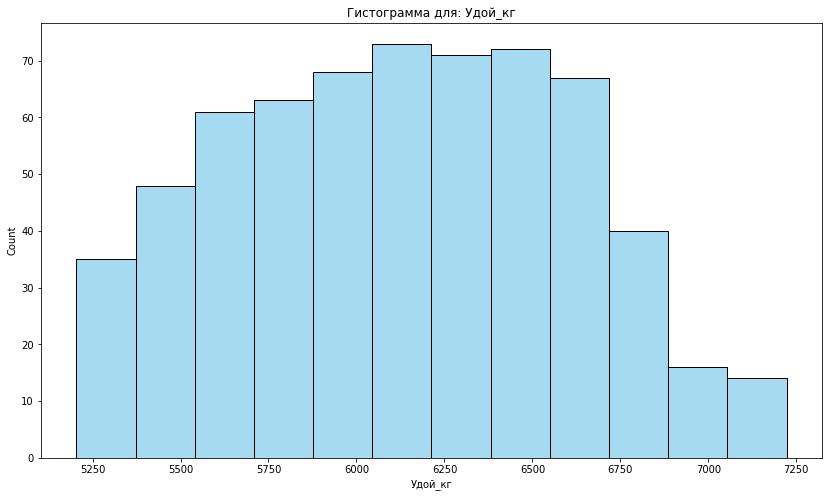

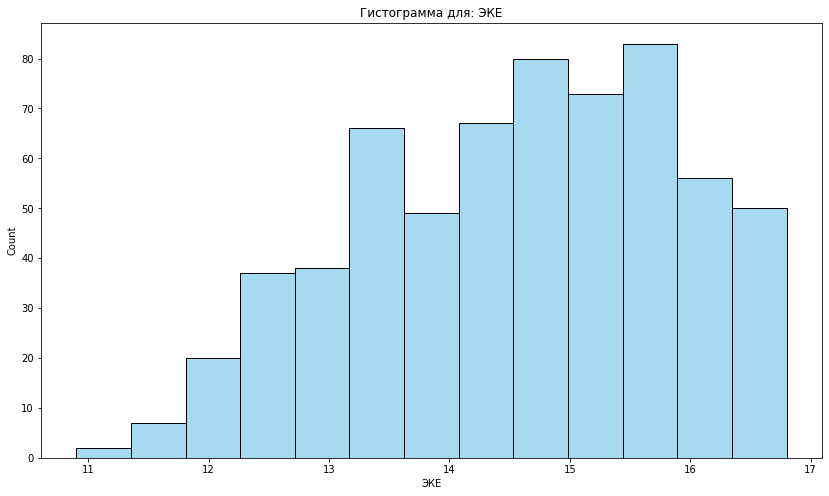

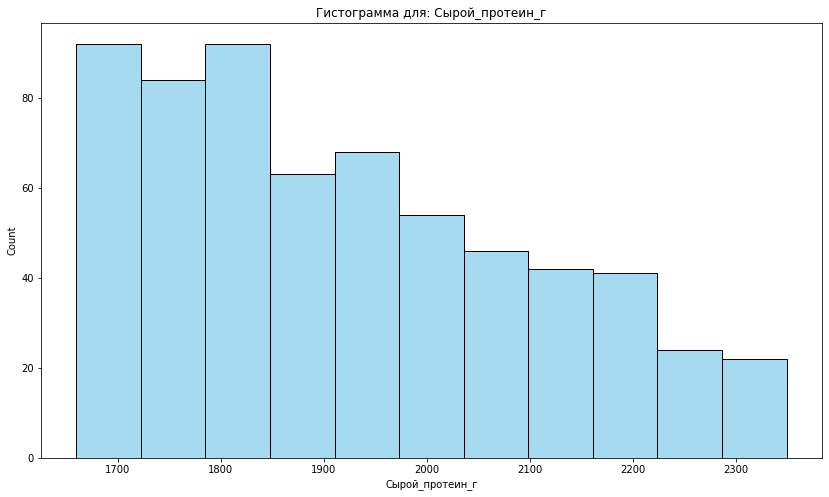

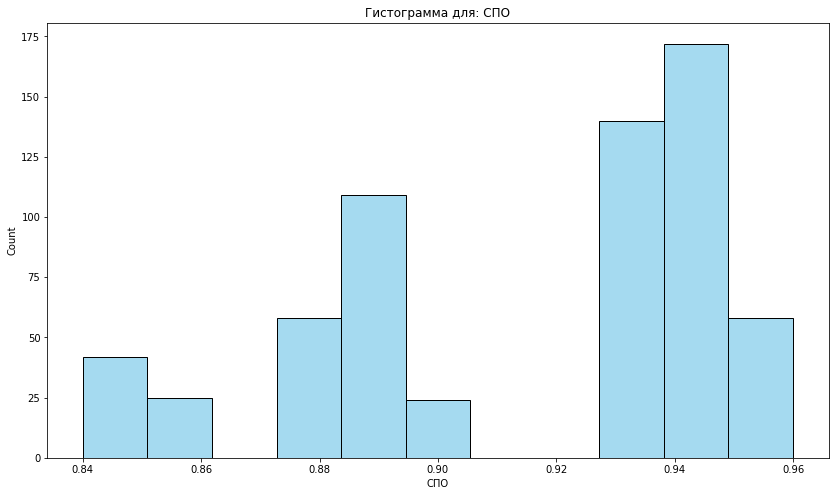

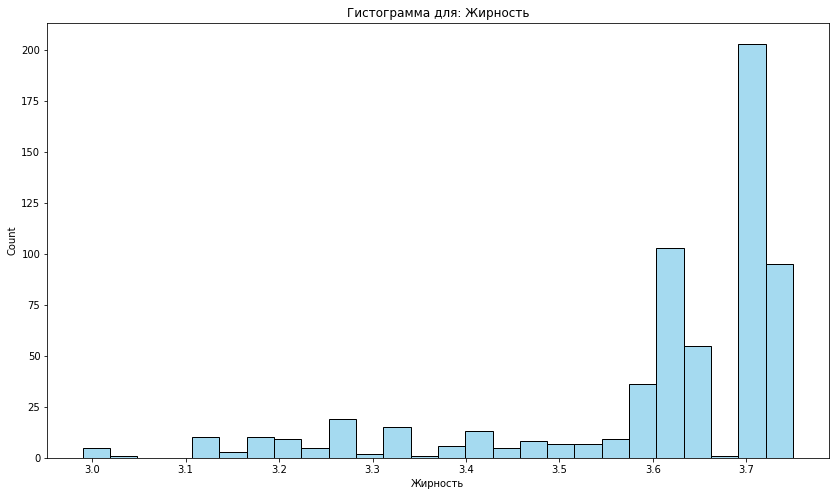

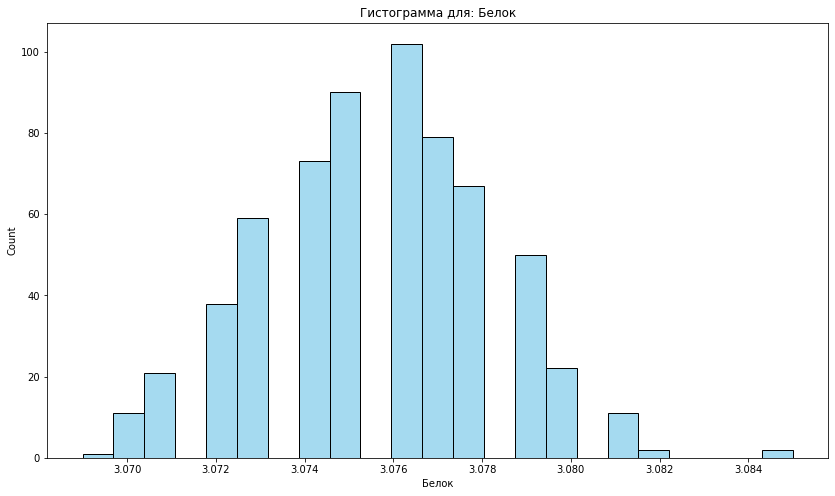

In [29]:
numerical_features = ['Удой_кг', 'ЭКЕ', 'Сырой_протеин_г', 'СПО', 'Жирность', 'Белок']

for feature in numerical_features:
    plt.figure(figsize=(14, 8))
    sns.histplot(ferma_main[feature], color='skyblue')
    plt.title(f'Гистограмма для: {feature}')
    plt.show()

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Ну здесь всё отлично, понимающему человеку ясно, что здесь ты детально исследуешь столбцы-признаки наших наблюдений. Вижу гистограммы/графики, отрисовывающие "нумерические" столбцы.

Здесь идеально всё. Использование графиков для изучения данных - лучше и не пожелать способа. Молодец!
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Просто супер: график подписан, оси подписаны. Не часто на самом деле такой скрупулёзный подход к оформлению встречается. Молодец! Также, здорово, что есть объяснение поведения данного графика. Пытаться понять полученный результат - важная часть работы аналитика.

Я закончил физико-математический факультет Петрозаводского государственного университета. Нас там с первого курса приучили - если на сдачу лабораторной работы по физике приходишь с графиком, на котором не подписано общее название, названия осей (с единицами измерений), единичная шкала - всё сдача заканчивается не начавшись. Или если у моей лабораторной работы отсутствует вывод: что делали? по какой методике? что "намеряли"? как интерпретировали? какой финальный вывод? - всё, тоже на выход. Ну и в принципе сейчас, на текущей работе: код, который написан в тетрадке мало кому понятен и не сильно кому интересен. Важнее детальные выводы и тренды, которые попадут на слайд презентации в PowerPoint. Именно поэтому столь важное значение в аналитике данных придается промежуточным выводам и уж тем более финальному. 
</div>

### Боксплоты

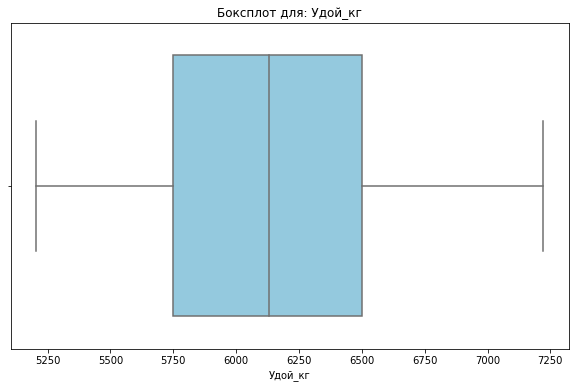

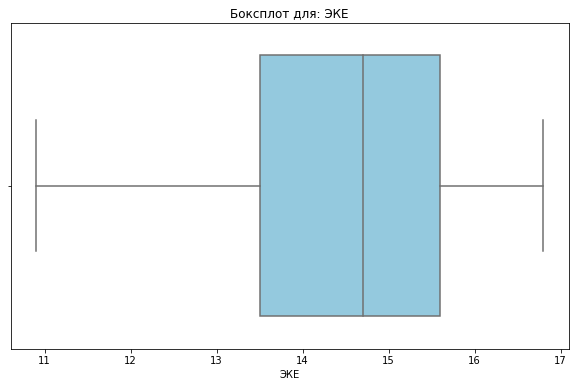

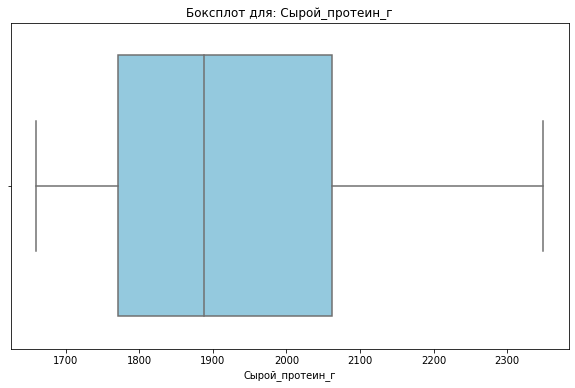

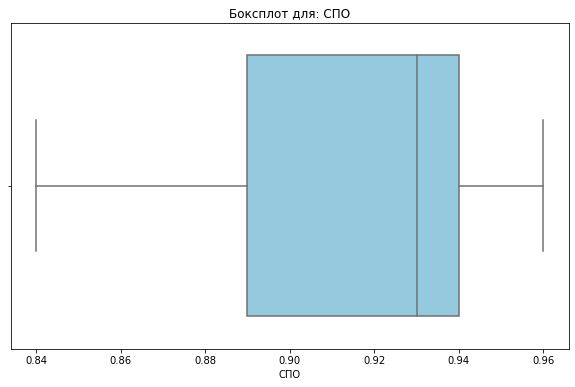

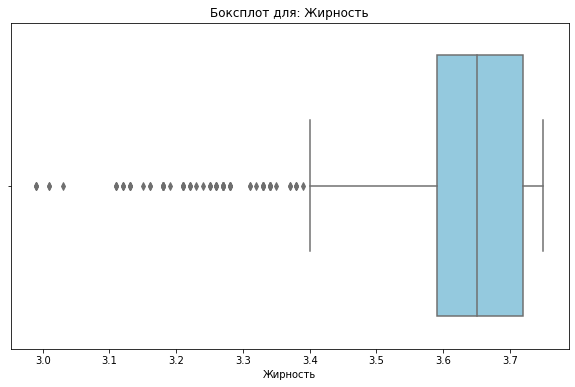

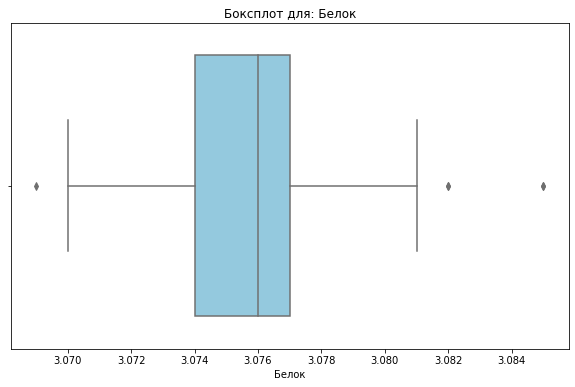

In [30]:
numerical_features = ['Удой_кг', 'ЭКЕ', 'Сырой_протеин_г', 'СПО', 'Жирность', 'Белок']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=ferma_main[feature], color='skyblue')
    plt.title(f'Боксплот для: {feature}')
    plt.show()

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично!  Боксплот рядом с гистограммой - это отлично! Гистограмма будет показывать нам распределение количественного признака, а боксплот даст информацию о выбросах и основных статистиках (квартилях) признака.
</div>

### Есть выбросы в столбцах "Белок и Жирность"

## Нужно обработать данные, исключив выбросы
          

In [31]:
ferma_main = ferma_main[ferma_main['Жирность'] >= 3.4]

In [32]:
ferma_main = ferma_main[ferma_main['Белок'] <= 3.080]
ferma_main = ferma_main[ferma_main['Белок'] >= 3.070]

In [33]:
# Статистический анализ для ferma_main
print("ferma_main:")
print(ferma_main.describe())

ferma_main:
               id      Удой_кг         ЭКЕ  Сырой_протеин_г         СПО  \
count  527.000000   527.000000  527.000000       527.000000  527.000000   
mean   313.493359  6210.711575   14.782543      1942.223909    0.918700   
std    181.751197   441.976111    1.180014       181.586374    0.029164   
min      1.000000  5207.000000   11.800000      1660.000000    0.840000   
25%    156.500000  5885.500000   13.900000      1793.500000    0.890000   
50%    312.000000  6232.000000   14.900000      1914.000000    0.930000   
75%    472.000000  6548.500000   15.700000      2086.500000    0.940000   
max    629.000000  7222.000000   16.800000      2349.000000    0.960000   

         Жирность      Белок  Вкус_молока     Возраст  
count  527.000000  527.00000   527.000000  527.000000  
mean     3.663928    3.07551     0.593928    0.897533  
std      0.075897    0.00238     0.491565    0.303549  
min      3.400000    3.07000     0.000000    0.000000  
25%      3.620000    3.07400    

### В cow_buy:

### Гистограммы

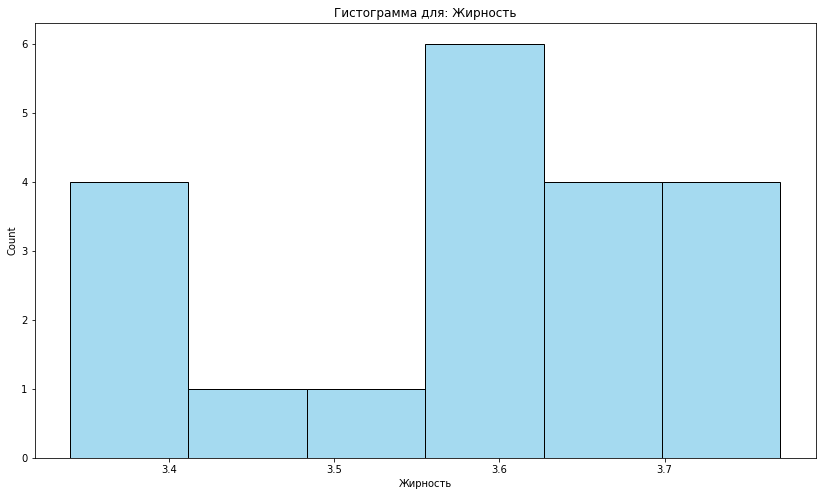

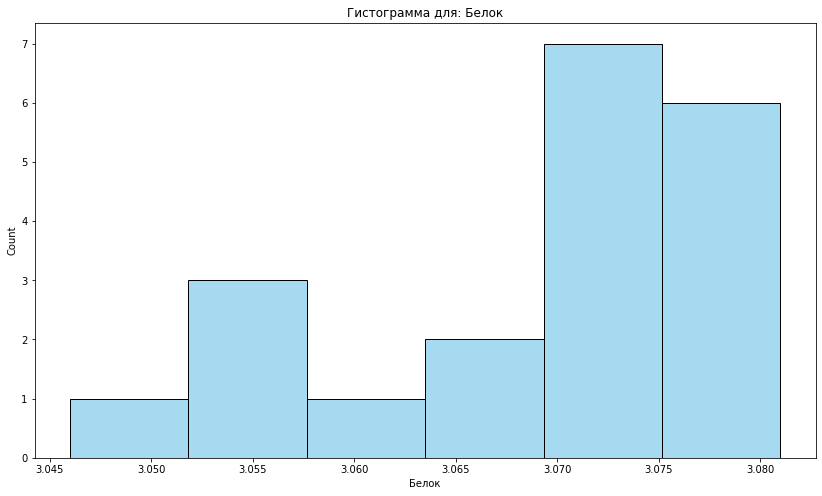

In [34]:
numerical_features = ['Жирность', 'Белок']

for feature in numerical_features:
    plt.figure(figsize=(14, 8))
    sns.histplot(cow_buy[feature], color='skyblue')
    plt.title(f'Гистограмма для: {feature}')
    plt.show()

### Боксплоты

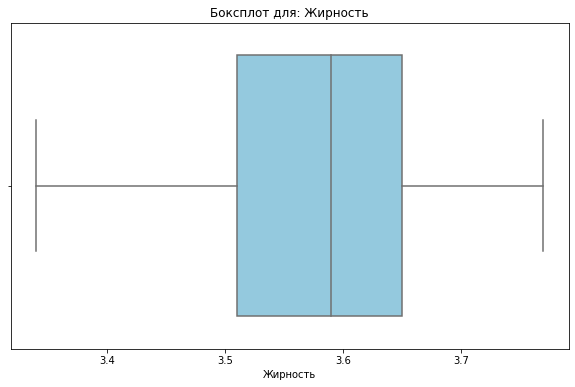

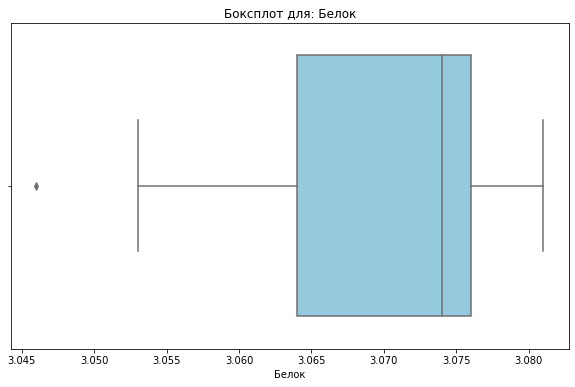

In [35]:
numerical_features = ['Жирность', 'Белок']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cow_buy[feature], color='skyblue')
    plt.title(f'Боксплот для: {feature}')
    plt.show()

In [36]:
# Статистический анализ для cow_buy
print("\n cow_buy:")
print(cow_buy.describe())


 cow_buy:
        Жирность      Белок    Возраст
count  20.000000  20.000000  20.000000
mean    3.577500   3.069500   0.750000
std     0.126818   0.010339   0.444262
min     3.340000   3.046000   0.000000
25%     3.510000   3.064000   0.750000
50%     3.590000   3.074000   1.000000
75%     3.650000   3.076000   1.000000
max     3.770000   3.081000   1.000000


С этим разобрались, переходим к категориальным признакам

## Построим графики для категориальных признаков

### В ferma_main:

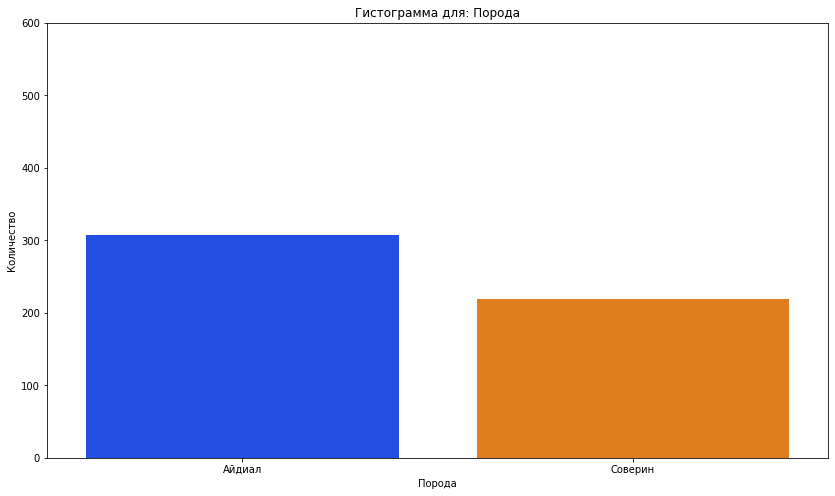

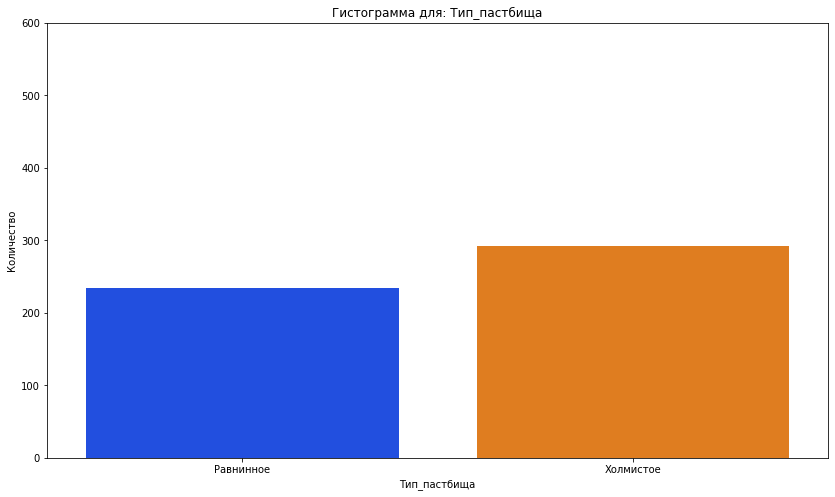

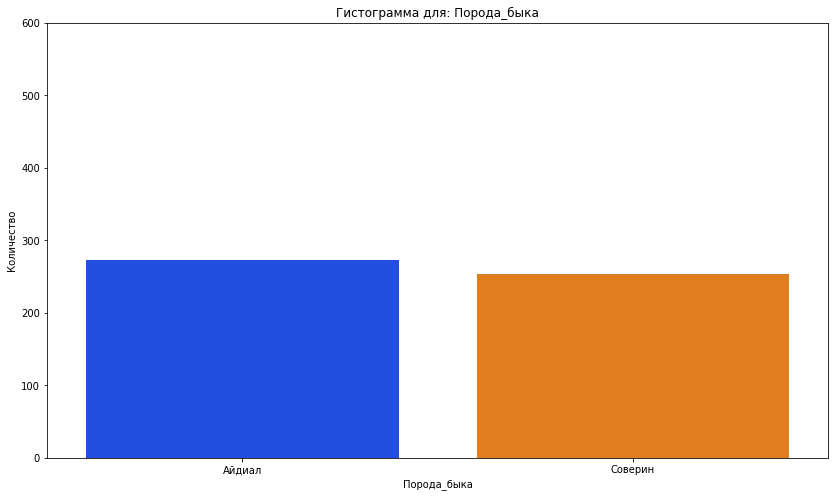

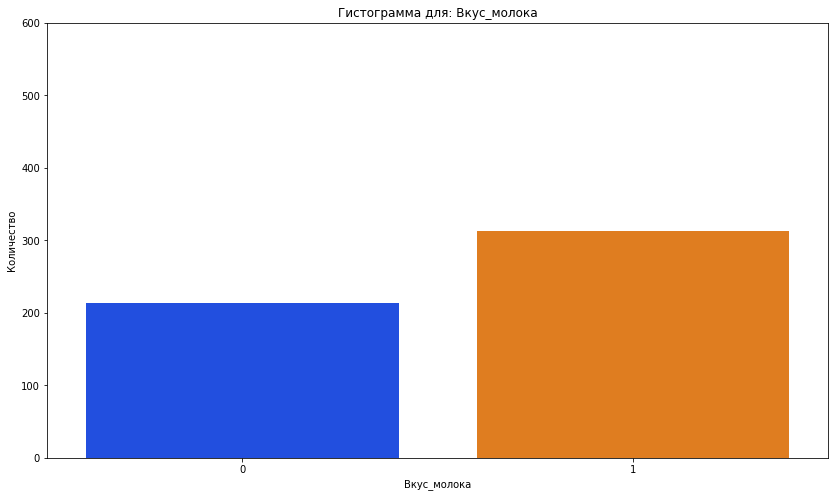

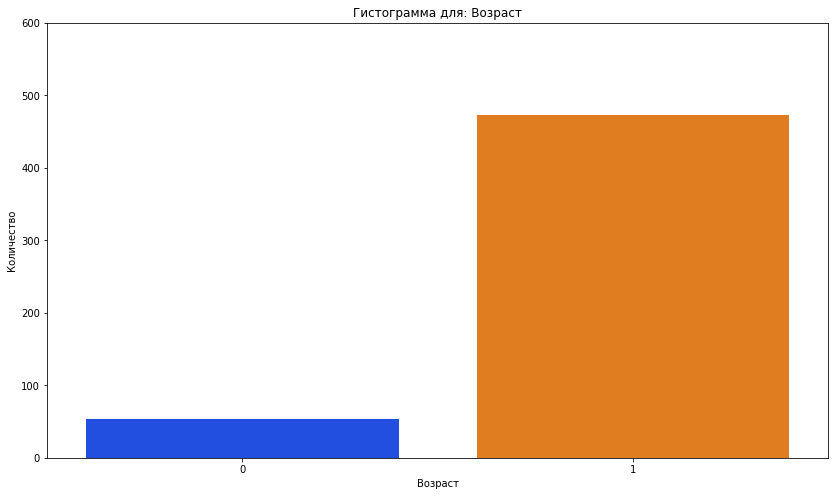

In [37]:
categorical_features = ['Порода', 'Тип_пастбища', 'Порода_быка', 'Вкус_молока', 'Возраст']

for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=feature, data=ferma_main, palette='bright')
    plt.title(f'Гистограмма для: {feature}')
    plt.ylim(0, 600)
    plt.ylabel('Количество')
    plt.show()

### В cow_buy:

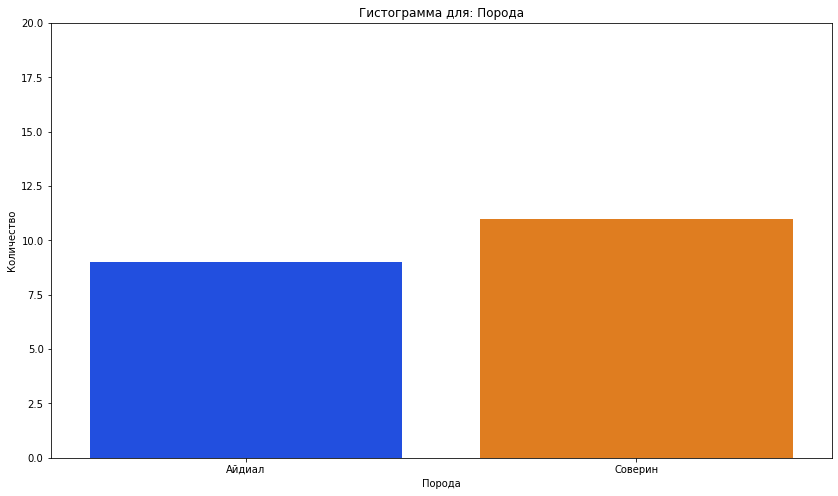

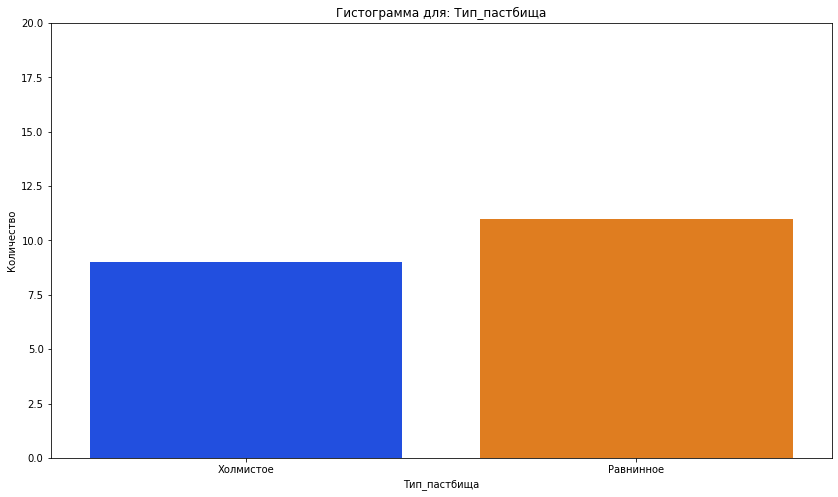

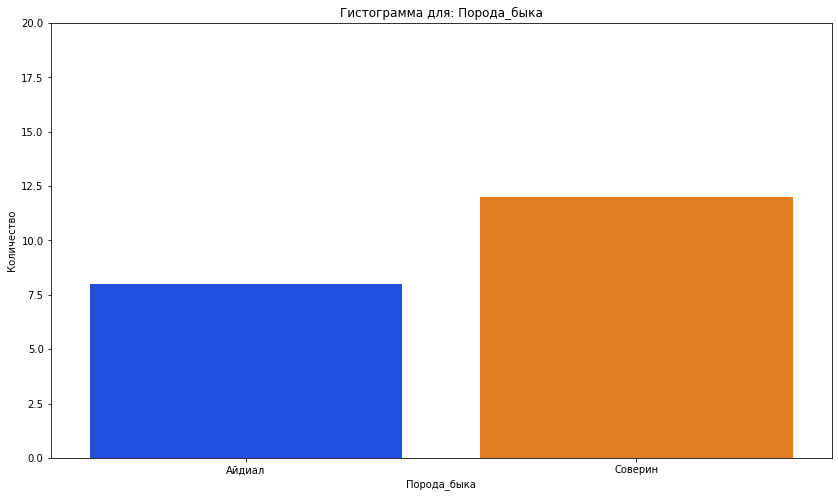

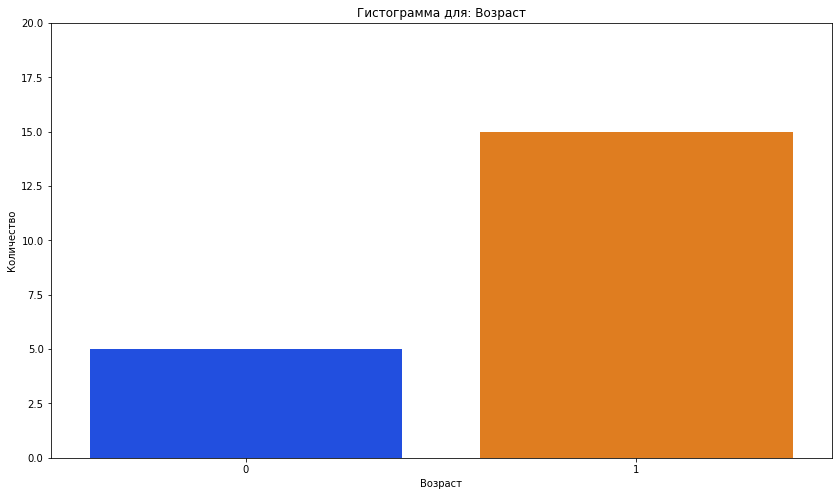

In [38]:
categorical_features = ['Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст']

for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=feature, data=cow_buy, palette='bright')
    plt.title(f'Гистограмма для: {feature}')
    plt.ylim(0, 20)
    plt.ylabel('Количество')
    plt.show()

In [39]:
# Статистический анализ для ferma_main
print("ferma_main:")
print(ferma_main.describe())

# Статистический анализ для ferma_dad
print("ferma_dad:")
print(ferma_dad.describe())

# Статистический анализ для cow_buy
print("\n cow_buy:")
print(cow_buy.describe())

ferma_main:
               id      Удой_кг         ЭКЕ  Сырой_протеин_г         СПО  \
count  527.000000   527.000000  527.000000       527.000000  527.000000   
mean   313.493359  6210.711575   14.782543      1942.223909    0.918700   
std    181.751197   441.976111    1.180014       181.586374    0.029164   
min      1.000000  5207.000000   11.800000      1660.000000    0.840000   
25%    156.500000  5885.500000   13.900000      1793.500000    0.890000   
50%    312.000000  6232.000000   14.900000      1914.000000    0.930000   
75%    472.000000  6548.500000   15.700000      2086.500000    0.940000   
max    629.000000  7222.000000   16.800000      2349.000000    0.960000   

         Жирность      Белок  Вкус_молока     Возраст  
count  527.000000  527.00000   527.000000  527.000000  
mean     3.663928    3.07551     0.593928    0.897533  
std      0.075897    0.00238     0.491565    0.303549  
min      3.400000    3.07000     0.000000    0.000000  
25%      3.620000    3.07400    

## Вывод:
Разобрались с выбросами, странными значениями и тд с помощью построенных графиков

# 4. Корреляционный анализ

##  Построим графики отношений количественных и категориальных признаков

Коэффициент корреляции Пирсона измеряет линейную корреляцию между двумя непрерывными переменными. Eсли данные не распределены нормально или содержат выбросы, коэффициент корреляции Пирсона может дать неправильные результаты.

Если данные не распределены нормально или содержат выбросы, лучше использовать метод корреляции, который менее чувствителен к выбросам: коэффициент корреляции Спирмена или коэффициент корреляции Кендалла.

                 Удой_кг   ЭКЕ  Сырой_протеин_г   СПО  Жирность  Белок  \
Удой_кг             1.00  0.72             0.37  0.74      0.63   0.01   
ЭКЕ                 0.72  1.00             0.31  0.69      0.62  -0.01   
Сырой_протеин_г     0.37  0.31             1.00  0.44      0.30   0.23   
СПО                 0.74  0.69             0.44  1.00      0.66   0.15   
Жирность            0.63  0.62             0.30  0.66      1.00   0.09   
Белок               0.01 -0.01             0.23  0.15      0.09   1.00   
Вкус_молока         0.07  0.24             0.13  0.27      0.14   0.10   
Возраст             0.53  0.45             0.18  0.44      0.34   0.03   

                 Вкус_молока  Возраст  
Удой_кг                 0.07     0.53  
ЭКЕ                     0.24     0.45  
Сырой_протеин_г         0.13     0.18  
СПО                     0.27     0.44  
Жирность                0.14     0.34  
Белок                   0.10     0.03  
Вкус_молока             1.00     0.06  
Возраст      

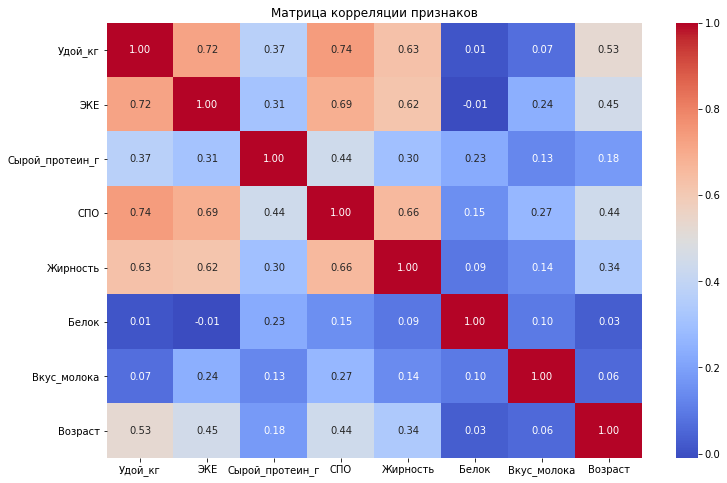

In [40]:
# Выделение признаков для анализа корреляции
features = ['Удой_кг', 'ЭКЕ', 'Сырой_протеин_г', 'СПО', 'Жирность', 'Белок', 'Порода', 'Тип_пастбища', 'Порода_быка', 'Вкус_молока', 'Возраст']

# Рассчет матрицы корреляции
correlation_matrix = ferma_main[features].corr(method='spearman').round(2)

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции признаков')
plt.show()

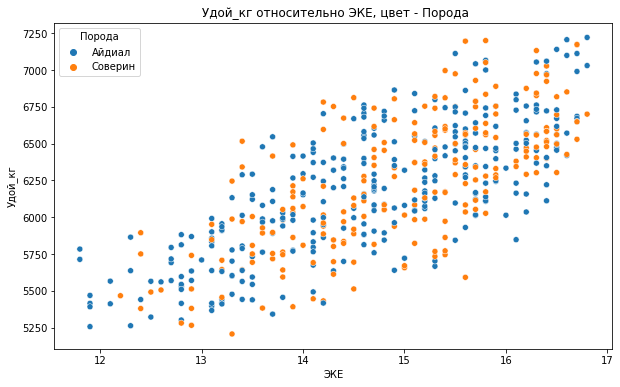

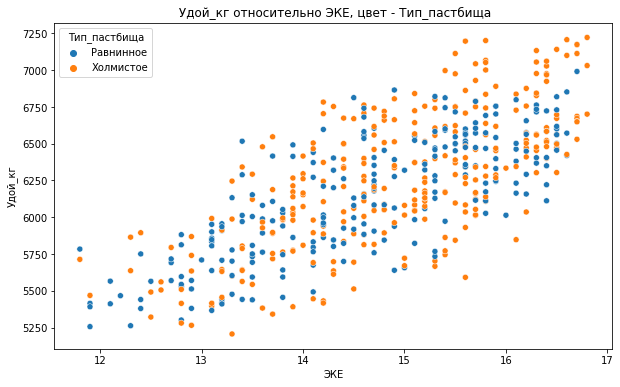

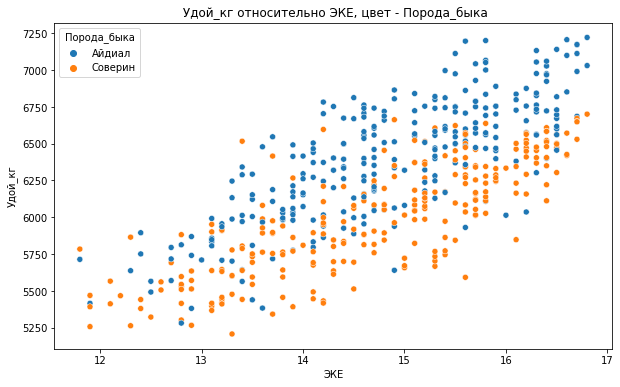

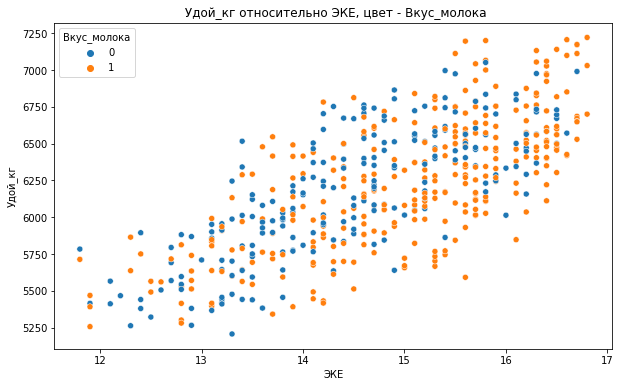

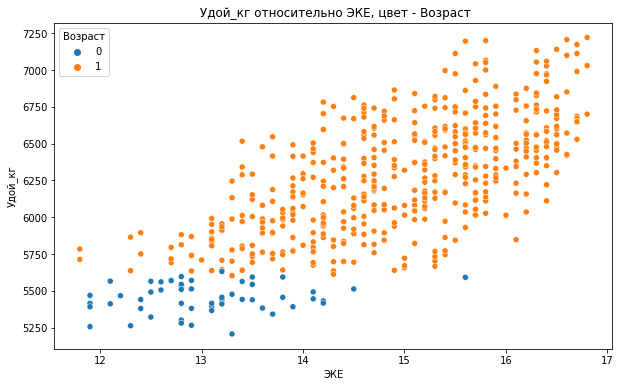

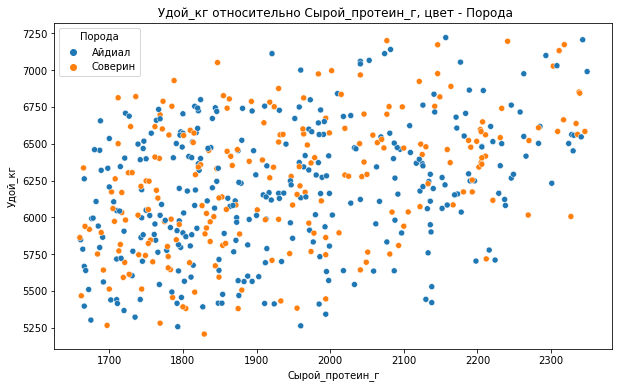

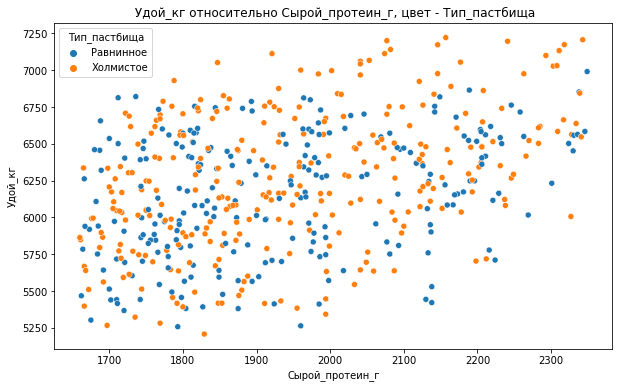

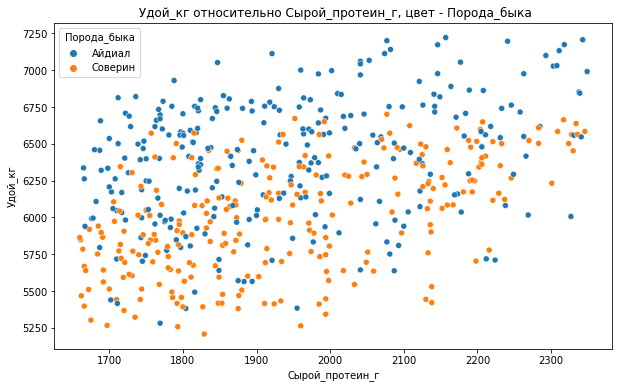

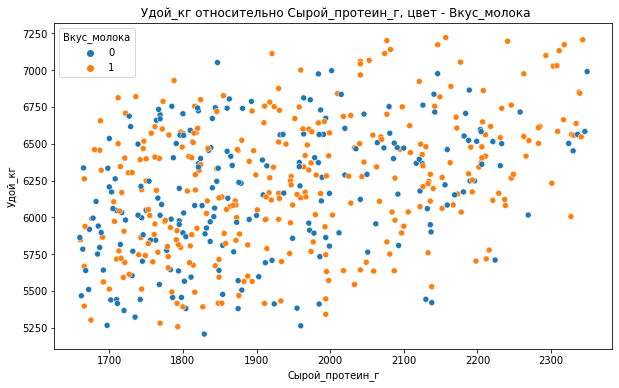

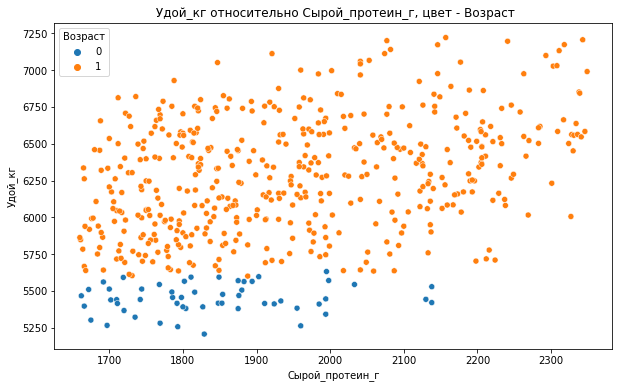

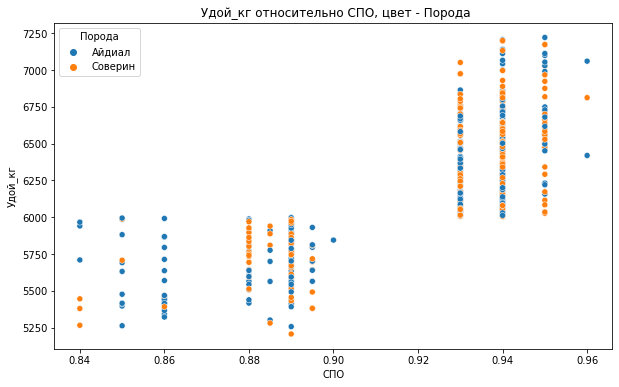

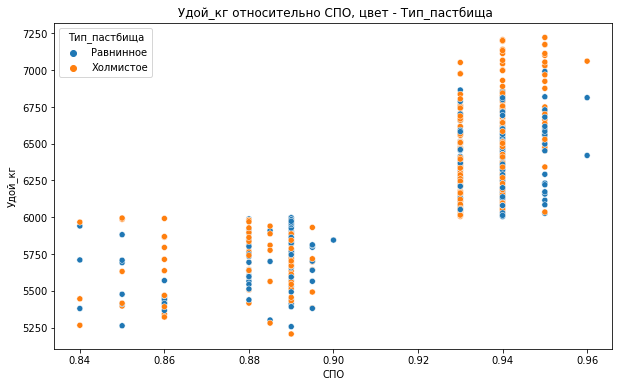

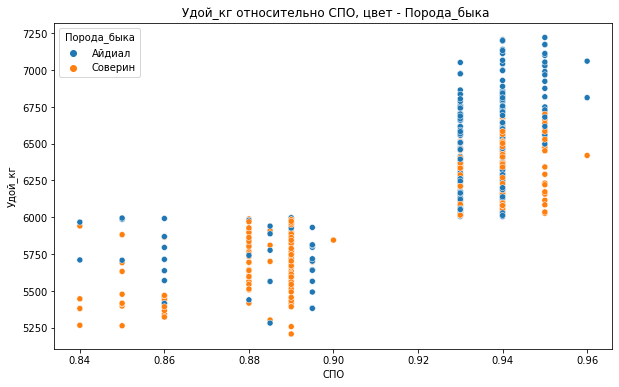

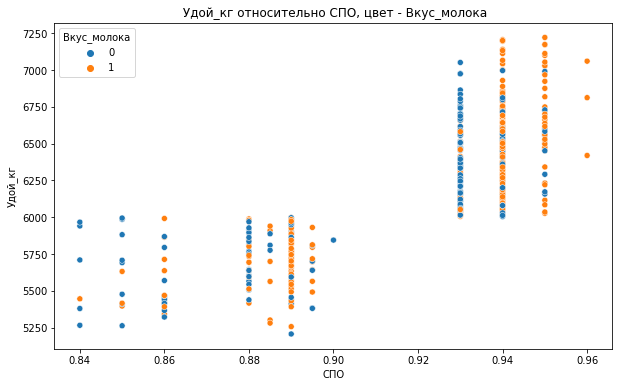

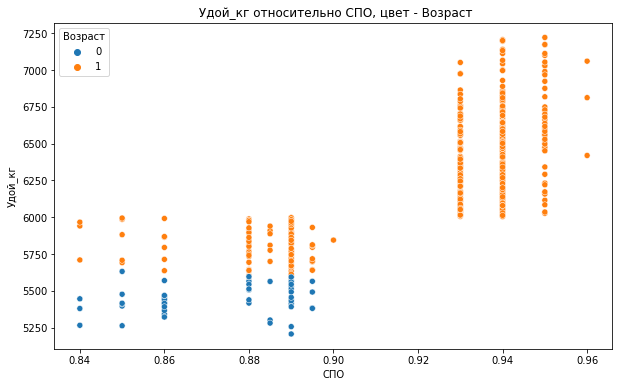

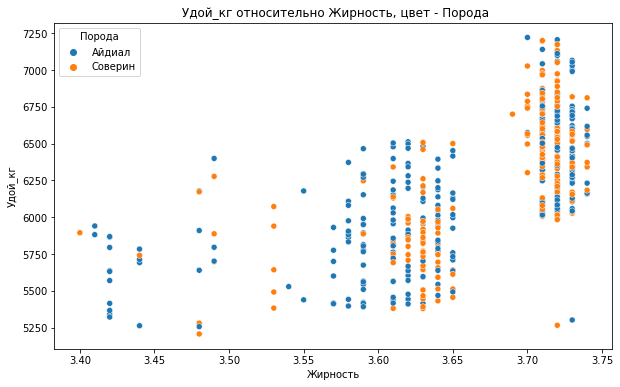

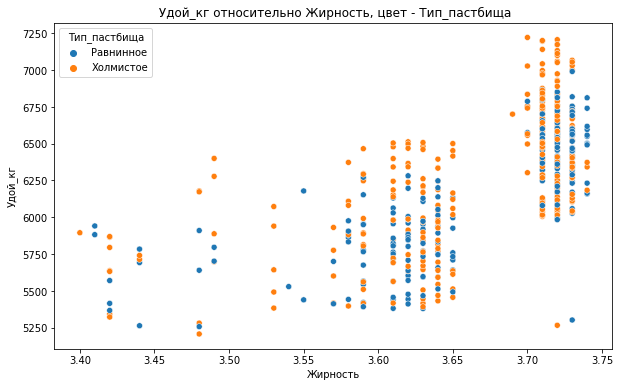

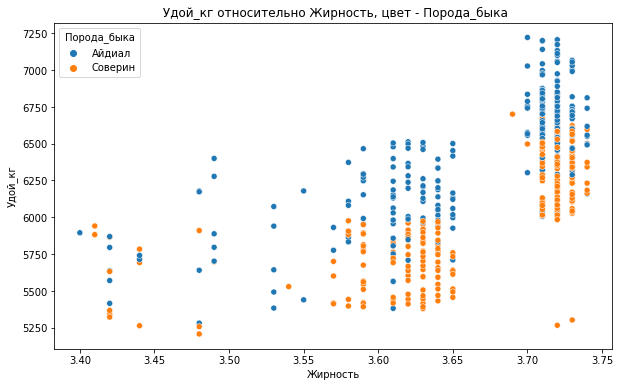

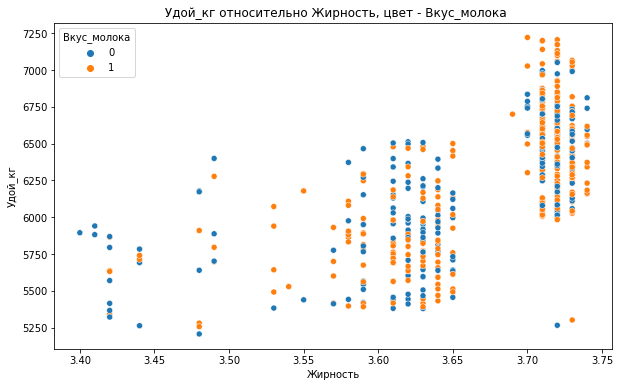

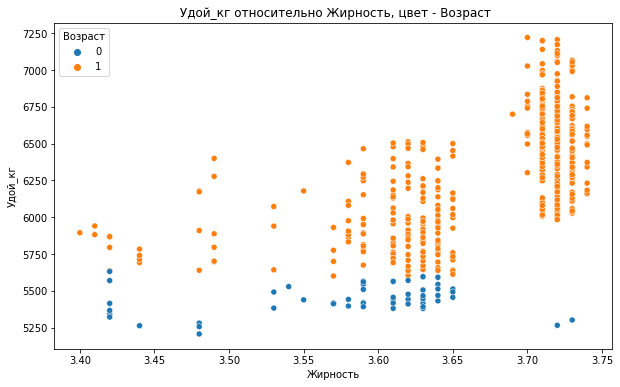

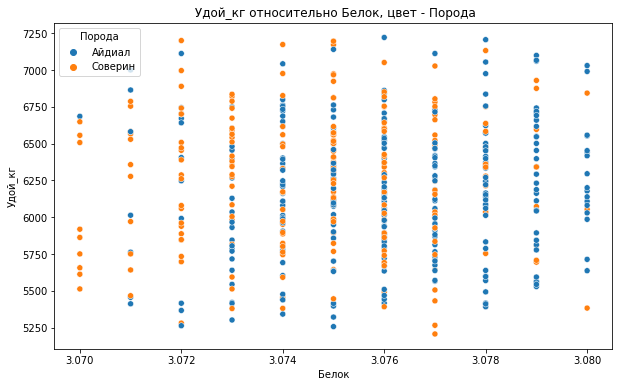

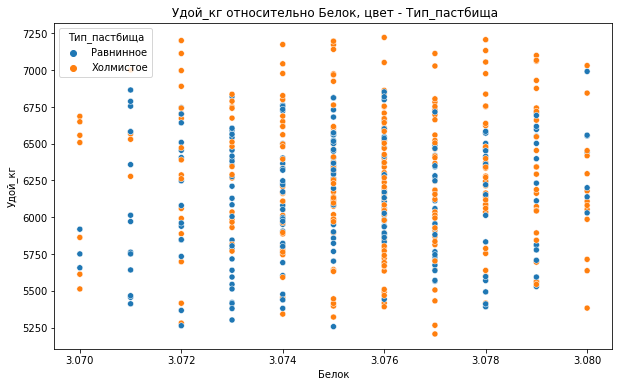

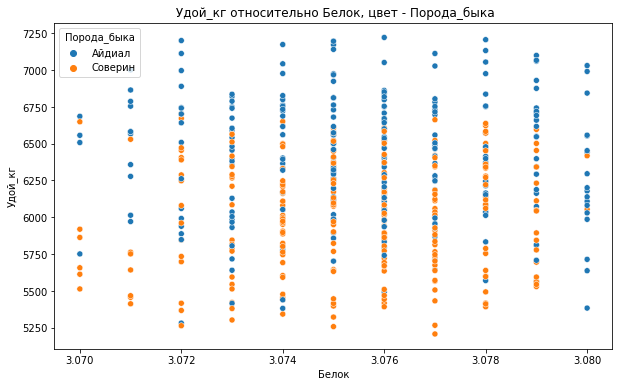

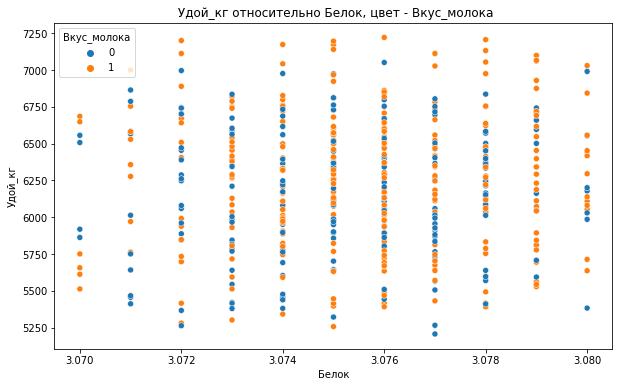

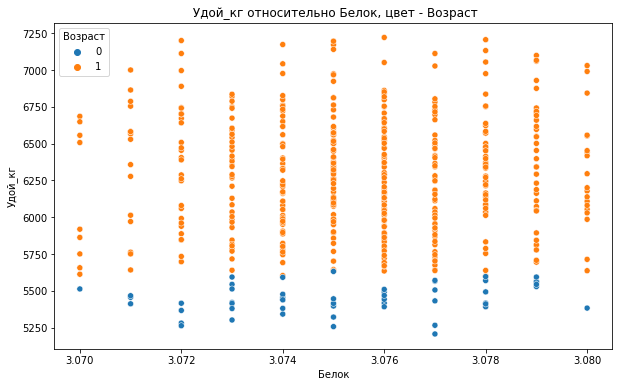

In [41]:
# Количественные и категориальные признаки
MAIN_NUM_COL = ['Удой_кг', 'ЭКЕ', 'Сырой_протеин_г', 'СПО', 'Жирность', 'Белок']
MAIN_CAT_COL = ['Порода', 'Тип_пастбища', 'Порода_быка', 'Вкус_молока', 'Возраст']

# Построение графиков
for num_feature in MAIN_NUM_COL[1:]:
    for cat_feature in MAIN_CAT_COL:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=num_feature, y='Удой_кг', hue=cat_feature, data=ferma_main)
        plt.title(f' Удой_кг относительно {num_feature}, цвет - {cat_feature}')
        plt.show()

## Если рассматривать корреляцию между всеми признаками, то можно выделить следующие закономерности:

### Удой_кг:
- Имеет сильную положительную корреляцию с ЭКЕ (0.73) и СПО (0.79), что указывает на то, что более высокий уровень энергии и соотношения сахара к протеину в корме может положительно влиять на удой коровы
### ЭКЕ:
- Также имеет умеренную корреляцию с Сырой_протеин_г (0.32) и Жирностью (0.68), что может свидетельствовать о влиянии энергии корма на содержание белка и жира в молоке
### Сырой_протеин_г:
- Имеет умеренную корреляцию с Жирностью (0.31) и незначительную корреляцию с Удоем_кг (0.38), что может указывать на влияние состава корма на содержание белка и жира в молоке, но не так сильно, как на удой
### СПО:
- Также имеет умеренную корреляцию с Жирностью (0.70) и незначительную корреляцию с Сырой_протеин_г (0.39), что может свидетельствовать о влиянии соотношения сахара к протеину в корме на содержание жира в молоке
### Жирность:
- Имеет умеренную корреляцию с Удоем_кг (0.64) и СПО (0.70), что указывает на влияние содержания жира в молоке на удой и соотношение сахара к протеину в корме
### Белок показывает незначительную корреляцию с другими признаками.
### Порода и Тип_пастбища:
- Показывают незначительные корреляции с другими признаками
### Порода_быка:
Имеет умеренную положительную корреляцию с Удой_кг (0.44), что может указывать на влияние породы быка на удой коровы
### Вкус_молока показывает незначительную корреляцию с другими признаками.
### Возраст коровы:
- Имеет умеренную корреляцию с Удоем_кг (0.58), что может указывать на влияние возраста коровы на ее продуктивность

## Тип взаимосвязи:
- В основном, взаимосвязь между целевым и входными признаками линейна

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Отбираем только количественные признаки, исключая 'Удой_кг'
numeric_features_without_yield = ferma_main.drop(columns=['Удой_кг']).select_dtypes(include=['float64', 'int64'])

# Добавляем фиктивный столбец для вычисления VIF
numeric_features_without_yield['Intercept'] = 1

# Рассчитываем VIF для каждого признака без 'Удой_кг'
vif_data_without_yield = pd.DataFrame()
vif_data_without_yield["feature"] = numeric_features_without_yield.columns
vif_data_without_yield["VIF"] = [variance_inflation_factor(numeric_features_without_yield.values, i) for i in range(numeric_features_without_yield.shape[1])]

# Округляем значения VIF
vif_data_without_yield["VIF"] = vif_data_without_yield["VIF"].round(2)

print(vif_data_without_yield)

           feature         VIF
0               id        1.05
1              ЭКЕ        2.58
2  Сырой_протеин_г        1.25
3              СПО        2.88
4         Жирность        2.33
5            Белок        1.10
6      Вкус_молока        1.08
7          Возраст        1.44
8        Intercept  1829769.84


## Мультиколлинеарность:
- На основе анализа коэффициентов VIF можно сделать вывод о том, что в исследуемом наборе данных отсутствует значительная мультиколлинеарность между признаками, что означает, что они могут быть использованы для построения модели с целевым признаком "Удой_кг" без опасения влияния мультиколлинеарности

# 5. Обучение модели линейной регрессии

## Первая модель:

R² модели 1: 0.765851435882341


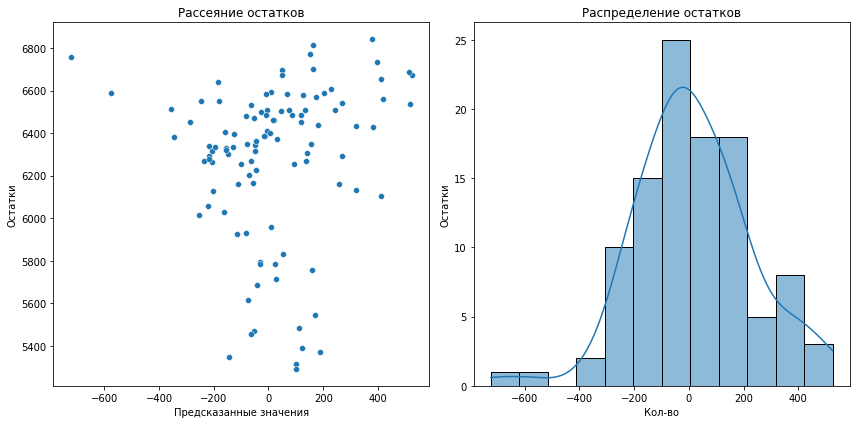

Метрики для первой модели:
MSE: 45594.616679100225
MAE: 161.60318192307128
RMSE: 213.52895981365202


In [43]:
# Определение константы RANDOM_STATE
RANDOM_STATE = 42

# Отбор признаков
selected_features = ['ЭКЕ', 'Сырой_протеин_г', 'СПО', 'Жирность', 'Белок',
                     'Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст']

X = ferma_main[selected_features]
y = ferma_main['Удой_кг']

# Разбиение данных на тренировочную и тестовую выборки
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Создание трансформатора для количественных признаков
numeric_features = ['ЭКЕ', 'Сырой_протеин_г', 'СПО', 'Жирность', 'Белок',]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Создание трансформатора для категориальных признаков
categorical_features = ['Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создание преобразователя признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание пайплайна, объединяющего преобразования и модель
model_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
model_1.fit(X_train_1, y_train_1)

# Оценка модели на тестовых данных
score_1 = model_1.score(X_test_1, y_test_1)

print(f'R² модели 1: {score_1}')

# Прогноз на тестовой выборке
predictions_1 = model_1.predict(X_test_1)

# Анализ остатков
residuals_1 = y_test_1 - predictions_1

# Графики остатков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(y=predictions_1, x=residuals_1)
plt.title('Рассеяние остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.subplot(1, 2, 2)
sns.histplot(residuals_1, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Кол-во')
plt.ylabel('Остатки')

plt.tight_layout()
plt.show()

# Получение прогнозов для первой модели
predictions_1 = model_1.predict(X_test_1)

# Расчет MSE для первой модели
mse_1 = mean_squared_error(y_test_1, predictions_1)

# Расчет MAE для первой модели
mae_1 = mean_absolute_error(y_test_1, predictions_1)

# Расчет RMSE для первой модели
rmse_1 = np.sqrt(mse_1)

# Вывод результатов
print("Метрики для первой модели:")
print(f"MSE: {mse_1}")
print(f"MAE: {mae_1}")
print(f"RMSE: {rmse_1}")

### Вывод:

Значение R² модели:
- Значение R² близко к 1, что говорит о том, что модель может хорошо объяснить вариацию в удое.

Анализ остатков:
- График остатков показывает, что они распределены случайным образом вокруг нуля.
- Распределение остатков близко к нормальному, что подтверждает адекватность модели.

## Вторая модель:

R² модели 2: 0.7512890545334197


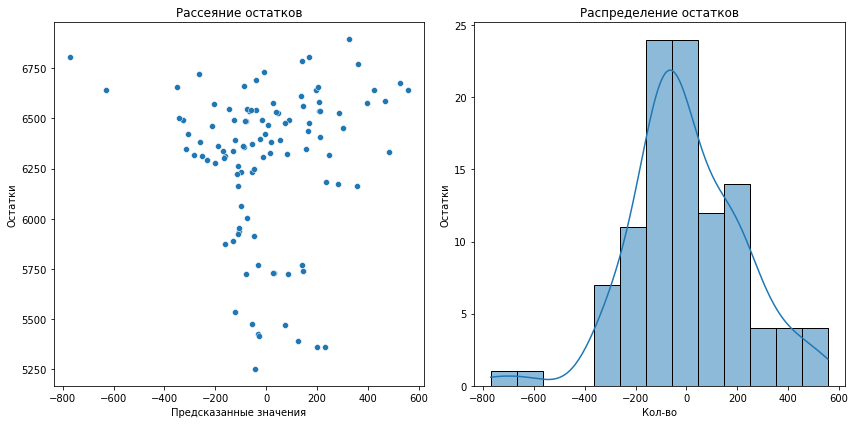

Метрики для второй модели:
MSE: 48430.278721449125
MAE: 168.34095717834873
RMSE: 220.06880451678998


In [44]:
# Создание копии датафрейма для проведения операций
ferma_main_copy = ferma_main.copy()

# Подготовка данных с учетом нелинейных связей
СПО_threshold = 0.92
ferma_main_copy['СПО_category'] = (ferma_main_copy['СПО'] > СПО_threshold).astype(int)
ferma_main_copy['ЭКЕ_squared'] = ferma_main_copy['ЭКЕ'] ** 2

# Отбор признаков
selected_features = ['ЭКЕ', 'ЭКЕ_squared', 'Сырой_протеин_г', 'СПО', 'СПО_category', 'Жирность', 'Белок',
                     'Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст']

X = ferma_main_copy[selected_features]
y = ferma_main_copy['Удой_кг']

# Разбиение данных на тренировочную и тестовую выборки
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Создание трансформатора для количественных признаков
numeric_features = ['ЭКЕ', 'ЭКЕ_squared', 'Сырой_протеин_г', 'СПО', 'СПО_category', 'Жирность', 'Белок',]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Создание трансформатора для категориальных признаков
categorical_features = ['Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создание преобразователя признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание пайплайна, объединяющего преобразования и модель
model_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
model_2.fit(X_train_2, y_train_2)

# Оценка модели на тестовых данных
score_2 = model_2.score(X_test_2, y_test_2)
print(f'R² модели 2: {score_2}')

# Прогноз на тестовой выборке
predictions_2 = model_2.predict(X_test_2)

# Анализ остатков
residuals_2 = y_test_2 - predictions_2

# Графики остатков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(y=predictions_2, x=residuals_2)
plt.title('Рассеяние остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.subplot(1, 2, 2)
sns.histplot(residuals_2, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Кол-во')
plt.ylabel('Остатки')

plt.tight_layout()
plt.show()

# Расчет MSE, MAE и RMSE для второй модели
mse_2 = mean_squared_error(y_test_2, predictions_2)
mae_2 = mean_absolute_error(y_test_2, predictions_2)
rmse_2 = np.sqrt(mse_2)

print("Метрики для второй модели:")
print(f"MSE: {mse_2}")
print(f"MAE: {mae_2}")
print(f"RMSE: {rmse_2}")


### Вывод:

Значение R² модели:
- Значение R² близко к 1, что говорит о том, что модель может хорошо объяснить вариацию в удое.

Анализ остатков:
- График остатков показывает, что они распределены случайным образом вокруг нуля.
- Распределение остатков близко к нормальному, что подтверждает адекватность модели.

## Третья модель:

R² модели 3: 0.8128711292012081


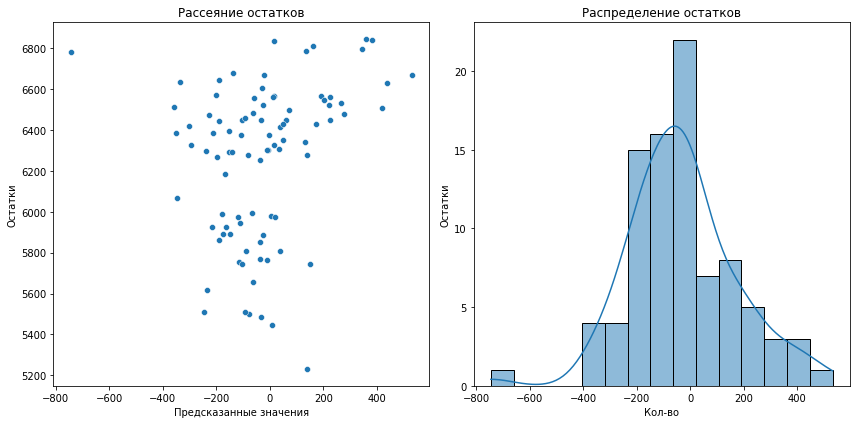

Метрики для третьей модели:
MSE: 41306.13006758011
MAE: 153.98235265376246
RMSE: 203.23909581470812


In [45]:
# Подготовка данных с учетом нового признака
ferma_w_dad = ferma_main_copy

ferma_main_with_dad = ferma_w_dad.merge(ferma_dad[['id', 'Имя_Папы']], on='id', how='inner')

# Добавляем столбец "Имя_Папы" к ferma_w_dad
ferma_w_dad['Имя_Папы'] = ferma_main_with_dad['Имя_Папы']

# Удаление всех строк с нулевыми значениями в столбце "Имя_Папы"
ferma_w_dad = ferma_w_dad.dropna(subset=['Имя_Папы'])

# Выбор признаков и целевой переменной
selected_features = ['ЭКЕ', 'ЭКЕ_squared', 'Сырой_протеин_г', 'СПО', 'СПО_category', 'Жирность', 'Белок',
                     'Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст', 'Имя_Папы']

X = ferma_w_dad[selected_features]
y = ferma_w_dad['Удой_кг']

# Разбиение данных на тренировочную и тестовую выборки
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Создание трансформатора для количественных признаков
numeric_features = ['ЭКЕ', 'ЭКЕ_squared', 'Сырой_протеин_г', 'СПО', 'СПО_category', 'Жирность', 'Белок',]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Создание трансформатора для категориальных признаков
categorical_features = ['Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст', 'Имя_Папы']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создание преобразователя признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание пайплайна, объединяющего преобразования и модель
model_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
model_3.fit(X_train_3, y_train_3)

# Оценка модели на тестовых данных
score_3 = model_3.score(X_test_3, y_test_3)
print(f'R² модели 3: {score_3}')

# Прогноз на тестовой выборке
predictions_3 = model_3.predict(X_test_3)

# Анализ остатков
residuals_3 = y_test_3 - predictions_3

# Графики остатков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(y=predictions_3, x=residuals_3)
plt.title('Рассеяние остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.subplot(1, 2, 2)
sns.histplot(residuals_3, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Кол-во')
plt.ylabel('Остатки')

plt.tight_layout()
plt.show()

# Расчет MSE, MAE и RMSE для третьей модели
mse_3 = mean_squared_error(y_test_3, predictions_3)
mae_3 = mean_absolute_error(y_test_3, predictions_3)
rmse_3 = np.sqrt(mse_3)

print("Метрики для третьей модели:")
print(f"MSE: {mse_3}")
print(f"MAE: {mae_3}")
print(f"RMSE: {rmse_3}")

### Вывод:

Значение R² модели:
- Значение R² близко к 1, что говорит о том, что модель может хорошо объяснить вариацию в удое.

Анализ остатков:
- График остатков показывает, что они распределены случайным образом вокруг нуля.
- Распределение остатков близко к нормальному, что подтверждает адекватность модели.

In [46]:
# Значения оценок модели
MSE = 42926.427537263546
MAE = 157.55779673924346
RMSE = 207.18693862611983

# Стандартное отклонение для RMSE
std_dev_rmse = RMSE

# Уровень доверия (например, 95%)
confidence_level = 0.95

# Количество стандартных отклонений для определения доверительного интервала (Z-оценка)
z_score = 1.96  # для уровня доверия 95%

# Определение границ доверительного интервала для MSE
lower_bound_mse = MSE - z_score * std_dev_rmse
upper_bound_mse = MSE + z_score * std_dev_rmse

# Определение границ доверительного интервала для MAE
lower_bound_mae = MAE - z_score * std_dev_rmse
upper_bound_mae = MAE + z_score * std_dev_rmse

# Определение границ доверительного интервала для RMSE
lower_bound_rmse = RMSE - z_score * std_dev_rmse
upper_bound_rmse = RMSE + z_score * std_dev_rmse

print("Доверительный интервал для MSE:", (lower_bound_mse, upper_bound_mse))
print("Доверительный интервал для MAE:", (lower_bound_mae, upper_bound_mae))
print("Доверительный интервал для RMSE:", (lower_bound_rmse, upper_bound_rmse))

Доверительный интервал для MSE: (42520.34113755635, 43332.51393697074)
Доверительный интервал для MAE: (-248.5286029679514, 563.6441964464383)
Доверительный интервал для RMSE: (-198.89946108107503, 613.2733383333147)


In [47]:
cow_buy

,Порода,Тип_пастбища,Порода_быка,Имя_Папы,Жирность,Белок,Возраст
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,1
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,1
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,1
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,0
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1
7,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1
8,Соверин,Равнинное,Соверин,Барин,3.59,3.074,1
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,0


In [48]:
# Определение признаков для cow_buy
selected_features_cow_buy = ['ЭКЕ', 'ЭКЕ_squared', 'Сырой_протеин_г', 'СПО', 'СПО_category','Жирность', 'Белок',
                             'Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст', 'Имя_Папы']

# Получение средних значений признаков из ferma_main и увеличение на 5%
mean_EKE = ferma_main['ЭКЕ'].mean() * 1.05
mean_protein = ferma_main['Сырой_протеин_г'].mean() * 1.05
mean_SPO = ferma_main['СПО'].mean() * 1.05 

# Заполнение недостающих признаков в cow_buy средними значениями из ferma_main
cow_buy['ЭКЕ'] = mean_EKE
cow_buy['Сырой_протеин_г'] = mean_protein
cow_buy['СПО'] = mean_SPO

cow_buy['СПО_category'] = (cow_buy['СПО'] > СПО_threshold).astype(int)
cow_buy['ЭКЕ_squared'] = cow_buy['ЭКЕ'] ** 2

# Подготовка данных для прогноза
X_cow_buy = cow_buy[selected_features_cow_buy]

# Получение прогнозов для cow_buy
predictions_cow_buy = model_3.predict(X_cow_buy)

# Округление прогнозов до целых чисел
rounded_predictions = np.round(predictions_cow_buy).astype(int)

# Создание DataFrame с прогнозами
predictions_df = pd.DataFrame({'id': range(1, len(cow_buy) + 1), 'Удой_кг': rounded_predictions})
predictions_df

,id,Удой_кг
0,1,6437
1,2,5780
2,3,6203
3,4,6423
4,5,6472
5,6,6122
6,7,6437
7,8,6128
8,9,6203
9,10,5946


### Вывод:
- Сформирован новый датафрейм с прогнозом удоя для коров 

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Да, всё так, молодец! В эталонном решении автора проекта ВСЕ 20 КОРОВ (он не удалял дубликаты) ПРОХОДЯТ по параметру "удой свыше 6.000 кг".
</div>

## Совместим датафрейм с предсказаниями с датафреймом cow_buy, чтобы предсказать вкус молока уже на нём

In [49]:
cow_buy

,Порода,Тип_пастбища,Порода_быка,Имя_Папы,Жирность,Белок,Возраст,ЭКЕ,Сырой_протеин_г,СПО,СПО_category,ЭКЕ_squared
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.52167,2039.335104,0.964635,1,240.922234
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.52167,2039.335104,0.964635,1,240.922234
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,1,15.52167,2039.335104,0.964635,1,240.922234
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.52167,2039.335104,0.964635,1,240.922234
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.52167,2039.335104,0.964635,1,240.922234
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.52167,2039.335104,0.964635,1,240.922234
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.52167,2039.335104,0.964635,1,240.922234
7,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.52167,2039.335104,0.964635,1,240.922234
8,Соверин,Равнинное,Соверин,Барин,3.59,3.074,1,15.52167,2039.335104,0.964635,1,240.922234
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.52167,2039.335104,0.964635,1,240.922234


# 6. Обучение модели логистической регрессии

In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [51]:
set(ferma_w_dad.columns) - set(cow_buy.columns)

{'id', 'Вкус_молока', 'Удой_кг'}

In [52]:
# Выделение признаков и целевой переменной (удаляем те признаки, которые нерелевантны для cow_buy и сам целевой признак)
X = ferma_w_dad.drop(columns=['Вкус_молока', 'Удой_кг', 'id'])
y = ferma_w_dad['Вкус_молока']

# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение преобразований для количественных и категориальных признаков
numeric_features = ['ЭКЕ', 'ЭКЕ_squared', 'Сырой_протеин_г', 'СПО', 'СПО_category', 'Жирность', 'Белок']
categorical_features = ['Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст', 'Имя_Папы']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создание преобразователя признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание и обучение модели логистической регрессии
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
model.fit(X_train, y_train)

# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Вывод метрик качества модели и матрицы ошибок
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7640449438202247
Precision: 0.7505854800936769
Recall: 0.7316017316017316
Confusion Matrix:
 [[20 13]
 [ 8 48]]


Исходя из метрик recall и precision, критичнее всего при покупке коров является ошибка первого рода, то есть ложно положительные предсказания, когда модель предсказывает, что корова дает вкусное молоко, хотя на самом деле она его не дает. Это связано с тем, что для заказчика главное - получить вкусное молоко.

Поэтому важнее всего минимизировать количество ложноположительных предсказаний, потому что в данном случае каждое такое предсказание означает неправильное отнесение коровы к категории "дающих вкусное молоко", что может привести к недовольству клиентов и потере прибыли.

Итак, при оценке модели более важно сосредоточиться на метрике precision и настроить модель таким образом, чтобы минимизировать количество ложноположительных предсказаний.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Все верно! Нужно минимизировать ошибку 1го рода (увеличивать точность модели даже в ущерб полноте). Решение как это сделать ты также верно озвучиваешь: подобрать такой порог, где FP будет равно 0.
</div>

In [53]:
best_recall = 0
best_precision = 0
best_threshold = 0

# Получение вероятностей принадлежности к классу 1 (вкусное молоко)
y_probabilities = model.predict_proba(X_test)[:, 1]

# Пробуем разные значения порога (от 0.55 до 0.9)
for threshold in np.arange(0.51, 0.9, 0.01):
    # Предсказываем классы с использованием текущего порога
    y_pred_threshold = (y_probabilities >= threshold).astype(int)
    
    # Вычисляем recall и precision
    recall = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    
    # Если precision максимален, сохраняем значения метрик и порог
    if precision > best_precision:
        recall = recall
        best_precision = precision
        best_threshold = threshold

print("Best threshold:", best_threshold)
print("Best recall:", best_recall)
print("Best precision:", best_precision)

# Предсказываем классы с использованием найденного порога
y_pred_threshold = (y_probabilities >= best_threshold).astype(int)

# Построение матрицы ошибок
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with FP = 0:\n", conf_matrix_threshold)

Best threshold: 0.8400000000000003
Best recall: 0
Best precision: 1.0
Confusion Matrix with FP = 0:
 [[33  0]
 [50  6]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
preprocessor.fit_transform(cow_buy
                          [['ЭКЕ', 'ЭКЕ_squared', 'Сырой_протеин_г', 'СПО', 'СПО_category', 'Жирность', 'Белок',
                            'Порода', 'Тип_пастбища', 'Порода_быка','Возраст', 'Имя_Папы']])

array([[ 1.        ,  1.        ,  0.        , -1.        ,  0.        ,
         0.02022535,  0.64502031,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        , -1.        ,  0.        ,
        -0.30338029,  1.14118979,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        , -1.        ,  0.        ,
         0.10112676,  0.44655253,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        , -1.        ,  0.        ,
        -1.43600002, -0.8434881 ,  0.        ,  1.        ,  0.        ,
         1.   

In [55]:
cow_buy

,Порода,Тип_пастбища,Порода_быка,Имя_Папы,Жирность,Белок,Возраст,ЭКЕ,Сырой_протеин_г,СПО,СПО_category,ЭКЕ_squared
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.52167,2039.335104,0.964635,1,240.922234
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.52167,2039.335104,0.964635,1,240.922234
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,1,15.52167,2039.335104,0.964635,1,240.922234
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.52167,2039.335104,0.964635,1,240.922234
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.52167,2039.335104,0.964635,1,240.922234
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.52167,2039.335104,0.964635,1,240.922234
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.52167,2039.335104,0.964635,1,240.922234
7,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.52167,2039.335104,0.964635,1,240.922234
8,Соверин,Равнинное,Соверин,Барин,3.59,3.074,1,15.52167,2039.335104,0.964635,1,240.922234
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.52167,2039.335104,0.964635,1,240.922234


## Предскажем вкус молока

In [56]:
# Определение признаков для предсказания
cow_buy_taste = cow_buy

# Подготовка данных для прогноза
X_cow_buy = cow_buy_taste[['ЭКЕ', 'ЭКЕ_squared', 'Сырой_протеин_г', 'СПО', 'СПО_category', 'Жирность', 'Белок',
                           'Порода', 'Тип_пастбища', 'Порода_быка', 'Возраст', 'Имя_Папы']]

# Получение прогнозов для cow_buy
predictions_cow_buy = model.predict_proba(X_cow_buy)[:, 1]
print(predictions_cow_buy)

predictions_binary = (predictions_cow_buy > best_threshold).astype(int)

# Вывод предсказаний списком с указанием на id
for i, pred in enumerate(predictions_binary, start=1):
    print(f"ID: {i}, Prediction: {pred}")

[0.35168584 0.36596104 0.22559036 0.25621789 0.26052463 0.26990917
 0.35168584 0.24632952 0.22559036 0.42983424 0.34131573 0.23113798
 0.34301758 0.45137287 0.22559036 0.26316826 0.39161886 0.33872068
 0.14875774 0.26052463]
ID: 1, Prediction: 0
ID: 2, Prediction: 0
ID: 3, Prediction: 0
ID: 4, Prediction: 0
ID: 5, Prediction: 0
ID: 6, Prediction: 0
ID: 7, Prediction: 0
ID: 8, Prediction: 0
ID: 9, Prediction: 0
ID: 10, Prediction: 0
ID: 11, Prediction: 0
ID: 12, Prediction: 0
ID: 13, Prediction: 0
ID: 14, Prediction: 0
ID: 15, Prediction: 0
ID: 16, Prediction: 0
ID: 17, Prediction: 0
ID: 18, Prediction: 0
ID: 19, Prediction: 0
ID: 20, Prediction: 0


# 7. Итоговые выводы

## 1. Были загружены и изучены данные, датафреймы были приведены в более читаемый вид

## 2. Была проведена предобработка данных, выполнена проверка на пропуски и дубликаты, все данные были приведены к нужным типам

## 3. Был проведен статистический аналез данных:
- Проведен статистический анализ всех признаков
- Построены графики для каждого признака, отдельные для качественных и количественных признаков
- Убраны выбросы

# 4. Проведен корреляционный анализ данных:
- Изучена взаимосвязь между признаками: рассчитаны коэффициенты корреляции между всеми признаками
- Построены диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков
- Сделаны выводы о взаимосвязи признаков

# 5. Задача регрессии
- Были обучены 3 модели линейной регрессии по заданию и выбрана одна, чтобы использовать её в качестве "учителя"
- Был получен прогноз удоя коров для фермера, сформированный в отдельный датафрейм

# 6. Задача классификации
- Была обучена модель логистической регрессии
- Идентифицированы и сведены к минимумы ошибки
- Получен прогноз вкуса молока коров

## Потом был построен датафрейм с коровами которые удовлетворяют требованиям фермера к количеству и качеству даваемого молока:
- 4 коровы он может купить без риска для стада